In [320]:

import pandas as pd
import matplotlib.pyplot as plt
import skforecast
from skforecast.plot import set_dark_theme
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
pizza_df = pd.read_csv('sales_db1.csv',index_col=0)
ingred_df = pd.read_csv('ingred_data.csv',index_col=0)

In [ ]:
pizza_df['order_date'] = pd.to_datetime(pizza_df['order_date'])

In [ ]:
####Aggregate qty 
qty_by_date = pizza_df.groupby(['order_date', 'pizza_name'])['quantity'].sum().reset_index()

In [ ]:
qty_by_date

In [ ]:
#date as rows and pizza name as columns
grp_df = qty_by_date.pivot(index = 'order_date', columns = 'pizza_name', values ='quantity').fillna(0)

In [ ]:
#####first 5
first_five = grp_df.columns[:4]

In [ ]:
qty_by_date.set_index('pizza_name').y.plot('quantity'),(figsize=(12,6), grid=True);

In [ ]:
pizza_df['day_of_week'] = pizza_df['order_date'].dt.dayofweek
pizza_df['day_of_year'] = pizza_df['order_date'].dt.dayofyear
pizza_df['week_of_year'] = pizza_df['order_date'].dt.isocalendar().week
pizza_df['month'] = pizza_df['order_date'].dt.month

In [ ]:
# Prepare the data for regression
X = pizza_df[['day_of_week', 'day_of_year', 'week_of_year', 'month']]
y = pizza_df['quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_predictions = regression_model.predict(X_test)
regression_mape = mean_absolute_percentage_error(y_test, regression_predictions)
regression_mse = mean_squared_error(y_test, regression_predictions)
regression_mae = mean_absolute_error(y_test, regression_predictions)
regression_r2 = r2_score(y_test, regression_predictions)
regression_rmse = np.sqrt(regression_mse)
print(f"Linear Regression MAPE: {regression_mape}")
print(f"Linear Regression MSE: {regression_mse}")
print(f"Linear Regression MAE: {regression_mae}")
print(f"Linear Regression R2: {regression_r2}")
print(f"Linear Regression RMSE: {regression_rmse}")

Linear Regression MAPE: 0.21326243791753077
Linear Regression MSE: 40044.5975332008
Linear Regression MAE: 139.9044998009975
Linear Regression R2: -0.23134613663833092
Linear Regression RMSE: 200.11146277312753


In [23]:
arima_model = sm.tsa.ARIMA(y_train, order=(5, 1, 0))
arima_result = arima_model.fit()
arima_predictions = arima_result.forecast(steps=len(y_test))
arima_mape = mean_absolute_percentage_error(y_test, arima_predictions)
arima_mse = mean_squared_error(y_test, arima_predictions)
arima_mae = mean_absolute_error(y_test, arima_predictions)
arima_r2 = r2_score(y_test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
print(f"ARIMA MAPE: {arima_mape}")
print(f"ARIMA MSE: {arima_mse}")
print(f"ARIMA MAE: {arima_mae}")
print(f"ARIMA R2: {arima_r2}")
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA MAPE: 0.2022062794312841
ARIMA MSE: 37089.41599018313
ARIMA MAE: 133.8969822867225
ARIMA R2: -0.14047616664942653
ARIMA RMSE: 192.58612616225275


In [26]:
sarima_model = sm.tsa.SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_predictions = sarima_result.forecast(steps=len(y_test))
sarima_mape = mean_absolute_percentage_error(y_test, sarima_predictions)
sarima_mse = mean_squared_error(y_test, sarima_predictions)
sarima_mae = mean_absolute_error(y_test, sarima_predictions)
sarima_r2 = r2_score(y_test, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
print(f"SARIMA MAPE: {sarima_mape}")
print(f"SARIMA MSE: {sarima_mse}")
print(f"SARIMA MAE: {sarima_mae}")
print(f"SARIMA R2: {sarima_r2}")
print(f"SARIMA RMSE: {sarima_rmse}")

C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA MAPE: 0.2363148056547604
SARIMA MSE: 46691.267607948495
SARIMA MAE: 162.39485883802462
SARIMA R2: -0.43572705247259713
SARIMA RMSE: 216.08162255950526


In [28]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mape = mean_absolute_percentage_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
print(f"Decision Tree MAPE: {dt_mape}")
print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree MAE: {dt_mae}")
print(f"Decision Tree R2: {dt_r2}")
print(f"Decision Tree RMSE: {dt_rmse}")

Decision Tree MAPE: 0.20757435370650237
Decision Tree MSE: 33444.0
Decision Tree MAE: 163.27272727272728
Decision Tree R2: -0.028381922420102512
Decision Tree RMSE: 182.87700784953805


In [37]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest MAPE: {rf_mape}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R2: {rf_r2}")
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest MAPE: 0.23025647225664586
Random Forest MSE: 38372.75099090908
Random Forest MAE: 161.6572727272727
Random Forest R2: -0.1799379091190938
Random Forest RMSE: 195.88963982535952


In [73]:
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

In [74]:
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
print(f"XGB MAPE: {xgb_mape}")
print(f"XGB MSE: {xgb_mse}")
print(f"XGB MAE: {xgb_mae}")
print(f"XGB R2: {xgb_r2}")
print(f"XGB RMSE: {xgb_rmse}")

XGB MAPE: 0.20747411606914348
XGB MSE: 33409.10404452174
XGB MAE: 163.17404452237216
XGB R2: -0.027309060096740723
XGB RMSE: 182.78157468552934


In [22]:
# Choose the best model based on MAPE
mape_results = [
    (regression_mape, 'Linear Regression'),
    (arima_mape, 'ARIMA'),
    (sarima_mape, 'SARIMA'),
    (xgb_mape, 'XGB'),

    (dt_mape, 'Decision Tree'),
    (rf_mape, 'Random Forest'),
   
]

best_model = min(mape_results)
print(f"Best Model: {best_model[1]} with MAPE: {best_model[0]}")

Best Model: ARIMA with MAPE: 0.2022062794312841


In [132]:

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost as xgb
from datetime import timedelta
from sklearn.model_selection import train_test_split


In [133]:
pizza_df = pd.read_csv('sales_db1.csv',index_col=0)
ingred_df = pd.read_csv('ingred_data.csv',index_col=0)

In [134]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
 12  week_day           48620 non-null  object 
 13  order_week         48620 non-null  int64  
 14  day_type           48620 non-null  object 
 15  month              48620 non-null  int64  
dtypes: float64(2), int64(5), ob

# ARIMA model

In [136]:

# Convert order_date to datetime
pizza_df['order_date'] = pd.to_datetime(pizza_df['order_date'], format='mixed')

In [137]:
pizza_df['day_of_week'] = pizza_df['order_date'].dt.day_name()
pizza_df['month'] = pizza_df['order_date'].dt.month
pizza_df['week_of_year'] = pizza_df['order_date'].dt.isocalendar().week

In [ ]:
# Aggregate sales data by day

In [138]:
sales_data = pizza_df.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()
sales_data.head()

,order_date,pizza_name_id,quantity
0,2015-01-01,bbq_ckn_l,6
1,2015-01-01,bbq_ckn_m,4
2,2015-01-01,bbq_ckn_s,1
3,2015-01-01,big_meat_s,11
4,2015-01-01,calabrese_m,1


In [139]:
# Prepare the data for Prophet (group by pizza_id)
forecast_results = [] # Initialize list to store forecast results
actuals = []  # Initialize list to store actual test values for MAPE calculation
predictions = []  # Initialize list to store predicted values

In [140]:

# Loop through each pizza_name_id and forecast
for pizza_id in sales_data['pizza_name_id'].unique():
    pizza_sales = sales_data[sales_data['pizza_name_id'] == pizza_id]
    
    # Check if there are enough data points
    if len(pizza_sales) > 5:  # Ensure we have sufficient data points

        # Split the data into training and testing sets
        train_size = int(len(pizza_sales) * 0.8)  # Use 80% of data for training
        train, test = pizza_sales['quantity'][:train_size], pizza_sales['quantity'][train_size:]


        # Fit the model
        model = ARIMA(train, order=(1, 0, 1))
        model_fit = model.fit()

        # Forecast for the next period (length of test set)
        forecasted_data = model_fit.forecast(steps=len(test))

        # Store actual and predicted values for MAPE calculation
        actuals.extend(test)
        predictions.extend(forecasted_data)

        # Forecast for the next 7 days (or your desired period)
        forecast_next_7_days = model_fit.forecast(steps=7)  # Forecasting the next 7 time points

        # Create a DataFrame for the forecast
        forecast_df = pd.DataFrame({
            'order_date': pd.date_range(start=pizza_sales['order_date'].max() + pd.Timedelta(days=1), periods=7),  # Create new dates
            'forecasted_sales': forecast_next_7_days,
            'pizza_name_id': pizza_id
        })
        
        # Append the results to the list
        forecast_results.append(forecast_df)

# Concatenate all forecast results into a single DataFrame
final_forecast_df = pd.concat(forecast_results, ignore_index=True)

C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SG_LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SG_LENOVO\AppData\Local\Programs\Pyth

In [141]:
# Calculate overall MAPE
overall_mape = mean_absolute_percentage_error(actuals, predictions)
print(f"Overall MAPE across all pizza types: {overall_mape:.5f}")

Overall MAPE across all pizza types: 0.54099


In [142]:
final_forecast_df.head(10)

,order_date,forecasted_sales,pizza_name_id
0,2016-01-01,3.109005,bbq_ckn_l
1,2016-01-02,3.048364,bbq_ckn_l
2,2016-01-03,3.037976,bbq_ckn_l
3,2016-01-04,3.036197,bbq_ckn_l
4,2016-01-05,3.035892,bbq_ckn_l
5,2016-01-06,3.035840,bbq_ckn_l
6,2016-01-07,3.035831,bbq_ckn_l
7,2016-01-01,3.131519,bbq_ckn_m
8,2016-01-02,2.895041,bbq_ckn_m
9,2016-01-03,2.881810,bbq_ckn_m


In [145]:
# Initialize a dictionary to hold the total ingredient requirements
ingredient_requirements = {}

# Loop through the forecasted quantities to calculate ingredient needs
for index, row in final_forecast_df.iterrows():
    pizza_id = row['pizza_name_id']
    predicted_quantity = row['forecasted_sales']
    
    # Find the ingredients for the corresponding pizza_id
    pizza_ingredients = ingred_df[ingred_df['pizza_name_id'] == pizza_id]
    
    for _, ingredient_row in pizza_ingredients.iterrows():
        ingredient = ingredient_row['pizza_ingredients']
        qty_per_pizza = ingredient_row['Items_Qty_In_Grams']
        
        total_qty = predicted_quantity * qty_per_pizza
        
        if ingredient not in ingredient_requirements:
            ingredient_requirements[ingredient] = 0
        ingredient_requirements[ingredient] += total_qty

# Convert ingredient requirements to a DataFrame for easier handling
ingredient_order = pd.DataFrame(list(ingredient_requirements.items()), columns=['Ingredient', 'Total_Quantity'])

In [146]:

ingredient_order

,Ingredient,Total_Quantity
0,Barbecued Chicken,1729.508007
1,Red Peppers,4482.167709
2,Green Peppers,2437.178296
3,Tomatoes,15859.329641
4,Red Onions,23221.231444
...,...,...
59,Prosciutto,385.845570
60,Caramelized Onions,0.000000
61,Pears,128.615190
62,Thyme,64.307595


## Prophet ##############

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
pizza_df = pd.read_csv('sales_db1.csv',index_col=0)
ingred_df = pd.read_csv('ingred_data.csv',index_col=0)

In [231]:
pizza_df.head(1)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,week_day,order_week,day_type,month
0,1,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,1,Weekday,1


In [232]:
ingred_df.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [233]:
#####convert date to time
pizza_df['order_date']=pd.to_datetime(pizza_df['order_date'], format = 'mixed')

In [235]:
######Aggregate sales data
sales_data = pizza_df.groupby('order_date')['quantity'].sum().reset_index()
sales_data.head(5)

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154


In [236]:
sales_data.rename(columns={"order_date": "ds", "quantity": "y"}, inplace = True)

In [237]:
sales_data.head()

,ds,y
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154


In [238]:
train = sales_data[sales_data['ds'] < '2015-11-01']
test = sales_data[sales_data['ds'] >= '2015-11-01']

In [239]:
train.tail()

,ds,y
294,2015-10-27,120
295,2015-10-28,104
296,2015-10-29,131
297,2015-10-30,166
298,2015-10-31,165


In [240]:
test.tail()

,ds,y
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82
357,2015-12-31,178


In [241]:
train.shape

(299, 2)

In [242]:
test.shape

(59, 2)

In [ ]:
!pip install fbprophet

In [244]:
from prophet import Prophet

In [245]:
model = Prophet()
model.fit(train)

19:54:11 - cmdstanpy - INFO - Chain [1] start processing
19:54:12 - cmdstanpy - INFO - Chain [1] done processing


In [246]:
# Predicting on the test set
future_test = test[['ds']].copy()
forecast_test = model.predict(future_test)

In [247]:

forecast_test.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
54,2015-12-27,137.093588,94.622303,146.179499,137.092453,137.094684,-16.104148,-16.104148,-16.104148,-16.104148,-16.104148,-16.104148,0.0,0.0,0.0,120.989440
55,2015-12-28,137.085034,103.867571,158.281243,137.083861,137.086168,-5.959829,-5.959829,-5.959829,-5.959829,-5.959829,-5.959829,0.0,0.0,0.0,131.125205
56,2015-12-29,137.076480,107.807832,161.333459,137.075273,137.077644,-2.187116,-2.187116,-2.187116,-2.187116,-2.187116,-2.187116,0.0,0.0,0.0,134.889364
57,2015-12-30,137.067925,109.128203,158.407426,137.066681,137.069120,-2.177201,-2.177201,-2.177201,-2.177201,-2.177201,-2.177201,0.0,0.0,0.0,134.890725
58,2015-12-31,137.059371,112.476460,167.461727,137.058084,137.060592,3.176983,3.176983,3.176983,3.176983,3.176983,3.176983,0.0,0.0,0.0,140.236354


In [248]:

# Calculate MAPE
mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])
print("MAPE on Test Data:", mape)

MAPE on Test Data: 0.1429175490670945


In [254]:
##predict future values

model1 = Prophet(changepoint_prior_scale=0.10,seasonality_prior_scale=10.0)
model1.add_seasonality(name='monthly', period=30.5, fourier_order=7)
model1.fit(sales_data)

19:59:58 - cmdstanpy - INFO - Chain [1] start processing
19:59:58 - cmdstanpy - INFO - Chain [1] done processing


In [287]:
# Define the forecast period (next 7 days)
future = model1.make_future_dataframe(periods=7,freq='W')
forecast = model1.predict(future)

In [288]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,140.007504,123.152301,177.228969,140.007504,140.007504,10.850629,10.850629,10.850629,4.520834,4.520834,4.520834,6.329795,6.329795,6.329795,0.0,0.0,0.0,150.858133
1,2015-01-02,139.999338,130.558092,185.531622,139.999338,139.999338,17.980222,17.980222,17.980222,-0.741544,-0.741544,-0.741544,18.721767,18.721767,18.721767,0.0,0.0,0.0,157.979561
2,2015-01-03,139.991173,114.096895,168.832021,139.991173,139.991173,1.628809,1.628809,1.628809,-2.497403,-2.497403,-2.497403,4.126213,4.126213,4.126213,0.0,0.0,0.0,141.619982
3,2015-01-04,139.983007,99.338758,153.573195,139.983007,139.983007,-14.166206,-14.166206,-14.166206,2.876971,2.876971,2.876971,-17.043178,-17.043178,-17.043178,0.0,0.0,0.0,125.816801
4,2015-01-05,139.974842,114.964459,170.975820,139.974842,139.974842,3.285086,3.285086,3.285086,8.446568,8.446568,8.446568,-5.161481,-5.161481,-5.161481,0.0,0.0,0.0,143.259928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2016-01-17,136.411101,86.479473,143.168668,136.405575,136.415083,-22.247358,-22.247358,-22.247358,-5.204181,-5.204181,-5.204181,-17.043178,-17.043178,-17.043178,0.0,0.0,0.0,114.163743
361,2016-01-24,136.317523,89.119865,144.615928,136.308976,136.324052,-20.223407,-20.223407,-20.223407,-3.180229,-3.180229,-3.180229,-17.043178,-17.043178,-17.043178,0.0,0.0,0.0,116.094116
362,2016-01-31,136.223944,92.657363,147.754046,136.212342,136.233451,-15.665711,-15.665711,-15.665711,1.377467,1.377467,1.377467,-17.043178,-17.043178,-17.043178,0.0,0.0,0.0,120.558233
363,2016-02-07,136.130365,97.488647,151.405663,136.115712,136.143404,-12.342574,-12.342574,-12.342574,4.700604,4.700604,4.700604,-17.043178,-17.043178,-17.043178,0.0,0.0,0.0,123.787792


In [289]:
next_week_forecast = forecast[['ds', 'yhat']].tail(7)
next_week_forecast.columns = ['next_week_date', 'quantity_week']
next_week_forecast

,next_week_date,quantity_week
358,2016-01-03,118.813537
359,2016-01-10,119.202340
360,2016-01-17,114.163743
361,2016-01-24,116.094116
362,2016-01-31,120.558233
363,2016-02-07,123.787792
364,2016-02-14,129.069854


In [290]:
predicted=forecast[["ds","yhat"]]
predicted.head()

,ds,yhat
0,2015-01-01,150.858133
1,2015-01-02,157.979561
2,2015-01-03,141.619982
3,2015-01-04,125.816801
4,2015-01-05,143.259928


In [291]:
actual_sales = sales_data.iloc[0:7]
actual_sales

,ds,y
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154
5,2015-01-06,184
6,2015-01-07,137


In [292]:
predicted_value = predicted[['yhat']].tail(7).values
predicted_value

array([[118.81353665],
       [119.20233951],
       [114.16374309],
       [116.09411582],
       [120.55823348],
       [123.78779156],
       [129.06985398]])

In [293]:
actual_value = actual_sales[["y"]].values
actual_value

array([[162],
       [191],
       [ 99],
       [135],
       [154],
       [184],
       [137]])

In [294]:

# Calculate MAPE
mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("MAPE on Predicted Data:", mape)

MAPE on Predicted Data: 0.21971123804664625


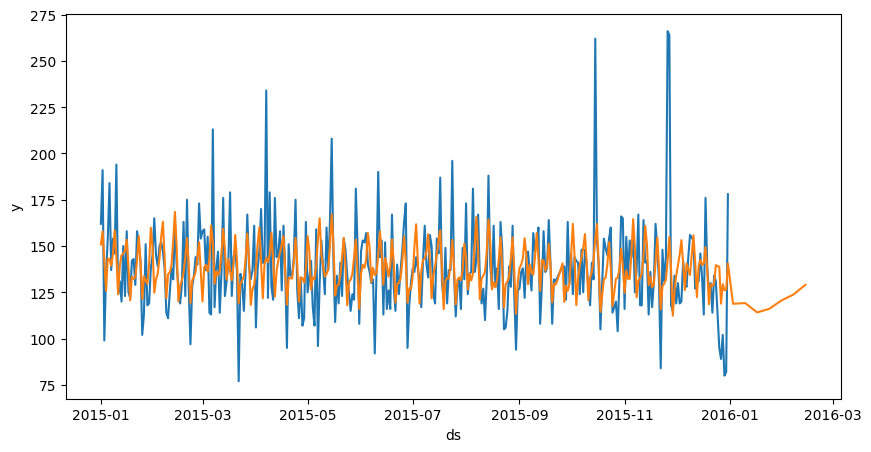

In [295]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_data,x="ds",y="y")
sns.lineplot(data=predicted,x="ds",y="yhat")
plt.show()

In [305]:
# Calculate the average daily sales proportion for each pizza type
pizza_type_proportion = pizza_df.groupby('pizza_name_id')['quantity'].sum() / pizza_df['quantity'].sum()

In [306]:

pizza_type_proportion

pizza_name_id
bbq_ckn_l        0.019990
bbq_ckn_m        0.019284
bbq_ckn_s        0.009763
big_meat_s       0.038932
brie_carre_s     0.009884
                   ...   
the_greek_xl     0.011135
the_greek_xxl    0.000565
veggie_veg_l     0.008613
veggie_veg_m     0.012809
veggie_veg_s     0.009360
Name: quantity, Length: 91, dtype: float64

In [307]:
next_week_forecast

,next_week_date,quantity_week
358,2016-01-03,118.813537
359,2016-01-10,119.202340
360,2016-01-17,114.163743
361,2016-01-24,116.094116
362,2016-01-31,120.558233
363,2016-02-07,123.787792
364,2016-02-14,129.069854


In [308]:
# Calculate expected sales by pizza type for each day in the forecast
forecasted_pizza_sales = []
for _, row in next_week_forecast.iterrows():
    daily_sales = row['quantity_week']
    for pizza_id, proportion in pizza_type_proportion.items():
        forecasted_pizza_sales.append({
            'next_week_date': row['next_week_date'],
            'pizza_name_id': pizza_id,
            'forecasted_sales': daily_sales * proportion
        })

In [310]:
forecasted_pizza_sales_df = pd.DataFrame(forecasted_pizza_sales)
forecasted_pizza_sales_df

,next_week_date,pizza_name_id,forecasted_sales
0,2016-01-03,bbq_ckn_l,2.375120
1,2016-01-03,bbq_ckn_m,2.291236
2,2016-01-03,bbq_ckn_s,1.159998
3,2016-01-03,big_meat_s,4.625613
4,2016-01-03,brie_carre_s,1.174378
...,...,...,...
632,2016-02-14,the_greek_xl,1.437176
633,2016-02-14,the_greek_xxl,0.072900
634,2016-02-14,veggie_veg_l,1.111728
635,2016-02-14,veggie_veg_m,1.653273


In [ ]:

# Merge forecasted sales with ingredient quantities
merged_data = pd.merge(forecasted_pizza_sales_df, ingred_df, on='pizza_name_id', how='left')

In [319]:
merged_data.head(10)

,next_week_date,pizza_name_id,forecasted_sales,pizza_name,pizza_ingredients,Items_Qty_In_Grams,total_ingredient_qty
0,2016-01-03,bbq_ckn_l,2.375120,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,95.004813
1,2016-01-03,bbq_ckn_l,2.375120,The Barbecue Chicken Pizza,Red Peppers,15.0,35.626805
2,2016-01-03,bbq_ckn_l,2.375120,The Barbecue Chicken Pizza,Green Peppers,20.0,47.502406
3,2016-01-03,bbq_ckn_l,2.375120,The Barbecue Chicken Pizza,Tomatoes,30.0,71.253610
4,2016-01-03,bbq_ckn_l,2.375120,The Barbecue Chicken Pizza,Red Onions,60.0,142.507219
5,2016-01-03,bbq_ckn_l,2.375120,The Barbecue Chicken Pizza,Barbecue Sauce,15.0,35.626805
6,2016-01-03,bbq_ckn_m,2.291236,The Barbecue Chicken Pizza,Barbecued Chicken,30.0,68.737085
7,2016-01-03,bbq_ckn_m,2.291236,The Barbecue Chicken Pizza,Red Peppers,10.0,22.912362
8,2016-01-03,bbq_ckn_m,2.291236,The Barbecue Chicken Pizza,Green Peppers,15.0,34.368542
9,2016-01-03,bbq_ckn_m,2.291236,The Barbecue Chicken Pizza,Tomatoes,20.0,45.824723


In [314]:

# Calculate total ingredient quantities for each ingredient
merged_data['total_ingredient_qty'] = merged_data['forecasted_sales'] * merged_data['Items_Qty_In_Grams']

In [315]:

merged_data.head()

,next_week_date,pizza_name_id,forecasted_sales,pizza_name,pizza_ingredients,Items_Qty_In_Grams,total_ingredient_qty
0,2016-01-03,bbq_ckn_l,2.37512,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,95.004813
1,2016-01-03,bbq_ckn_l,2.37512,The Barbecue Chicken Pizza,Red Peppers,15.0,35.626805
2,2016-01-03,bbq_ckn_l,2.37512,The Barbecue Chicken Pizza,Green Peppers,20.0,47.502406
3,2016-01-03,bbq_ckn_l,2.37512,The Barbecue Chicken Pizza,Tomatoes,30.0,71.253610
4,2016-01-03,bbq_ckn_l,2.37512,The Barbecue Chicken Pizza,Red Onions,60.0,142.507219


In [316]:
# Aggregate to get the total quantity needed for each ingredient
total_ingredient_needs = merged_data.groupby('pizza_ingredients')['total_ingredient_qty'].sum().reset_index()
total_ingredient_needs.columns = ['Ingredient', 'Total_Quantity_needed(Grams)']
total_ingredient_needs

,Ingredient,Total_Quantity_needed(Grams)
0,?duja Salami,696.455964
1,Alfredo Sauce,259.176019
2,Anchovies,721.329391
3,Artichokes,2142.680221
4,Arugula,248.309812
...,...,...
59,Sun-dried Tomatoes,319.958865
60,Thai Sweet Chilli Sauce,961.998901
61,Thyme,41.597199
62,Tomatoes,10087.575489


In [317]:
# Purchase order creation, listing each ingredient and the quantity needed
purchase_order = total_ingredient_needs
print("Purchase Order:")
purchase_order

Purchase Order:


,Ingredient,Total_Quantity_needed(Grams)
0,?duja Salami,696.455964
1,Alfredo Sauce,259.176019
2,Anchovies,721.329391
3,Artichokes,2142.680221
4,Arugula,248.309812
...,...,...
59,Sun-dried Tomatoes,319.958865
60,Thai Sweet Chilli Sauce,961.998901
61,Thyme,41.597199
62,Tomatoes,10087.575489


In [340]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

#### SARIMA Model

In [321]:
pizza_df = pd.read_csv('sales_db1.csv',index_col=0)
ingred_df = pd.read_csv('ingred_data.csv',index_col=0)

In [322]:
pizza_df.head(1)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,week_day,order_week,day_type,month
0,1,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,1,Weekday,1


In [323]:
ingred_df.head(1)

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0


In [326]:
pizza_df['order_date'] = pd.to_datetime(pizza_df['order_date'], format = 'mixed')

In [327]:
sales_data = pizza_df.groupby('order_date')['quantity'].sum().reset_index()

In [328]:
sales_data.head()

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154


In [329]:
#split data
split = "2015-09-30"

In [330]:
train =sales_data[sales_data['order_date']<=split]
test = sales_data[sales_data['order_date']>split]

In [331]:
train.shape

(270, 2)

In [332]:
test.shape

(88, 2)

In [347]:
#Model

model =SARIMAX(train['quantity'], order=(1,0,1), seasonal_order=(1,1,1,2))
srmodel_fit =model.fit()

In [348]:
forecasted_data = srmodel_fit.forecast(steps= len(test))

In [349]:
mape = mean_absolute_percentage_error(test['quantity'], forecasted_data)
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Percentage Error: 0.14553000145311812


In [351]:
forecast_next_7days = srmodel_fit.forecast(steps=7)
forecast_df = pd.DataFrame({
            'order_date': pd.date_range(start=sales_data['order_date'].max() + pd.Timedelta(days=1), periods=7),  # Create new dates
            'forecasted_sales': forecast_next_7days
        })

In [352]:
forecast_df

,order_date,forecasted_sales
270,2016-01-01,137.283266
271,2016-01-02,139.317436
272,2016-01-03,139.332442
273,2016-01-04,138.348603
274,2016-01-05,139.002486
275,2016-01-06,138.289365
276,2016-01-07,138.897156


In [353]:
predicted_value = forecast_df[['forecasted_sales']].values

In [354]:
predicted_value

array([[137.28326566],
       [139.31743587],
       [139.33244194],
       [138.34860314],
       [139.00248554],
       [138.28936546],
       [138.8971559 ]])

In [355]:
actual_sales= sales_data.iloc[0:7]

In [356]:
actual_sales

,order_date,quantity
0,2015-01-01,162
1,2015-01-02,191
2,2015-01-03,99
3,2015-01-04,135
4,2015-01-05,154
5,2015-01-06,184
6,2015-01-07,137


In [357]:
actual_value = actual_sales[['quantity']].values
actual_value

array([[162],
       [191],
       [ 99],
       [135],
       [154],
       [184],
       [137]])

In [358]:
mape = mean_absolute_percentage_error(actual_value, predicted_value)
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Percentage Error: 0.17357518840539973


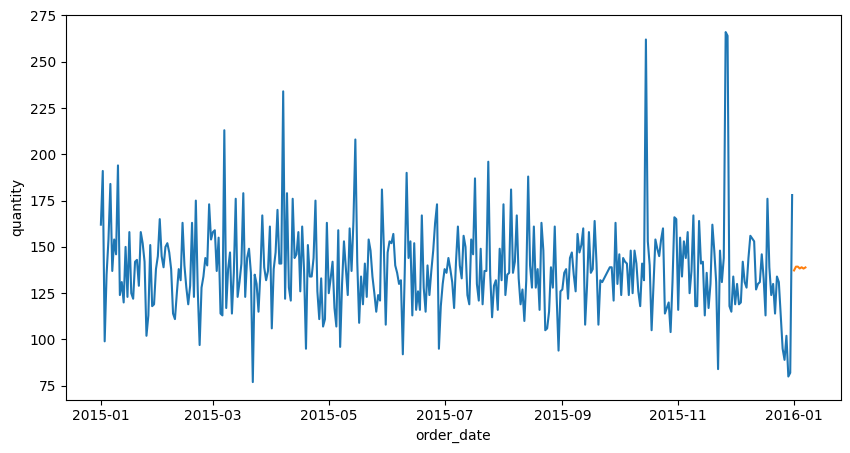

In [359]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_data,x="order_date",y="quantity")
sns.lineplot(data=forecast_df,x="order_date",y="forecasted_sales")
plt.show()

In [360]:
forecast_df

,order_date,forecasted_sales
270,2016-01-01,137.283266
271,2016-01-02,139.317436
272,2016-01-03,139.332442
273,2016-01-04,138.348603
274,2016-01-05,139.002486
275,2016-01-06,138.289365
276,2016-01-07,138.897156


In [361]:
ingred_df = pd.read_csv('ingred_data.csv',index_col=0)

In [385]:
ingred_df.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [386]:
ingredient_requirements = []

In [387]:
for index, row in forecast_df.iterrows():
    date = row['order_date']
    predicted_sales = int(row['forecasted_sales'])

    for _, ingred_rows  in ingred_df.iterrows():
        ingredient_qty = ingred_rows['Items_Qty_In_Grams'] * predicted_sales

        #append the ingredient requirements to the list
        ingredient_requirements.append({
            "Date": date,
            "Ingredient": ingred_rows ["pizza_ingredients"],
            "Total Quantity Needed (grams)": ingredient_qty 
        
        })

# Convert the list to a DataFrame
ingredient_requirements_df = pd.DataFrame(ingredient_requirements)

# Reset index for better readability
# ingredient_requirements_df.reset_index(drop=True, inplace=True)    

In [388]:

ingredient_requirements_df

,Date,Ingredient,Total Quantity Needed (grams)
0,2016-01-01,Barbecued Chicken,5480.0
1,2016-01-01,Red Peppers,2055.0
2,2016-01-01,Green Peppers,2740.0
3,2016-01-01,Tomatoes,4110.0
4,2016-01-01,Red Onions,8220.0
...,...,...,...
3621,2016-01-07,Green Peppers,2760.0
3622,2016-01-07,Red Onions,2760.0
3623,2016-01-07,Zucchini,1380.0
3624,2016-01-07,Spinach,2070.0


In [406]:
large =ingredient_requirements_df.nlargest(20, "Total Quantity Needed (grams)")


In [407]:
large

,Date,Ingredient,Total Quantity Needed (grams)
1010,2016-01-02,Beef Chuck Roast,27800.0
1528,2016-01-03,Beef Chuck Roast,27800.0
2564,2016-01-05,Beef Chuck Roast,27800.0
2046,2016-01-04,Beef Chuck Roast,27600.0
3082,2016-01-06,Beef Chuck Roast,27600.0
3600,2016-01-07,Beef Chuck Roast,27600.0
492,2016-01-01,Beef Chuck Roast,27400.0
536,2016-01-02,Bacon,20850.0
564,2016-01-02,Chicken,20850.0
585,2016-01-02,Chicken,20850.0


#### highest quantity required ingredients  (Beef Chuck Roast	, Bacon,Chicken,Capocollo,Calabrese Salami	)

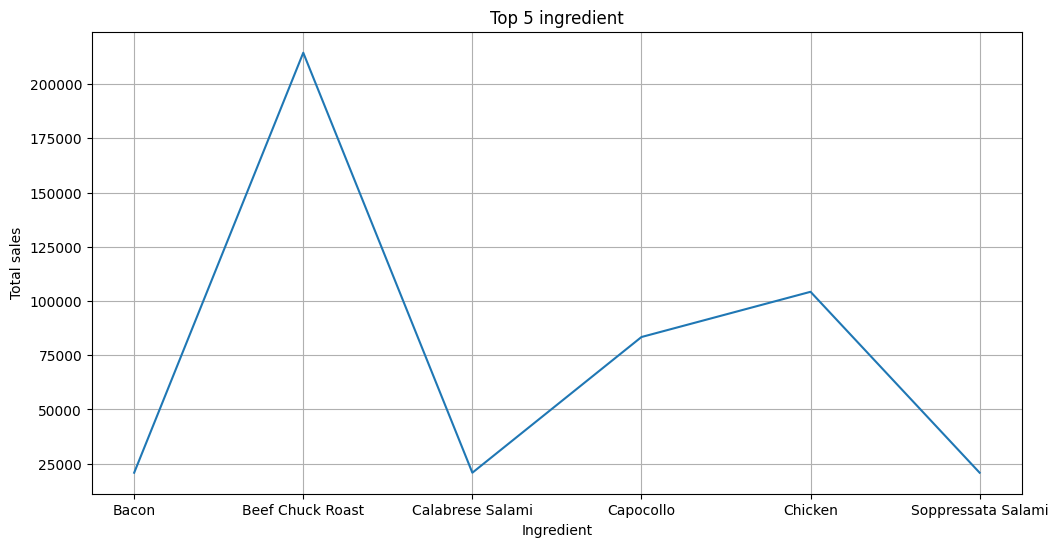

In [409]:
# daily sales analysis
daily_sales = large.groupby('Ingredient')['Total Quantity Needed (grams)'].sum()

plt.figure(figsize = (12,6))
daily_sales.plot()
plt.title("Top 5 ingredient")
plt.xlabel("Ingredient")
plt.ylabel("Total sales")
plt.grid(True)
plt.show()
